# Library and data import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Data exploration

In [ ]:
df = pd.read_csv("heart_indicators_data_cleaned.csv") 
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Data normalization

After viewing all spreads of attributes we must:

Scale:
*   BMI
*   GenHlth
*   Age

Log-scale
*   MentHlth - 6
*   PhysHlth
*   Education
*   Income



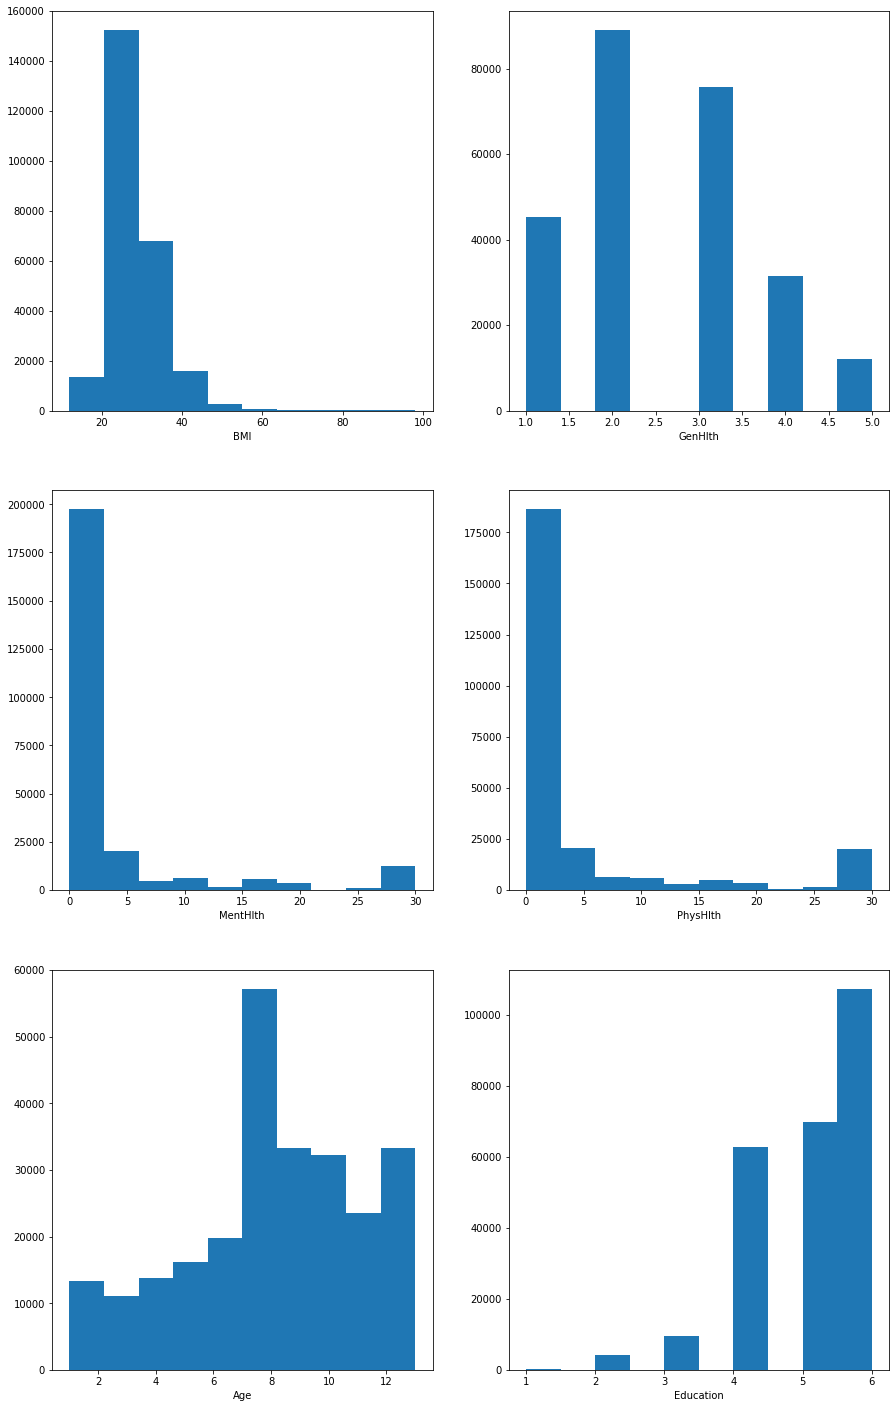

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,25))

index = 0

binary = ["BMI","GenHlth","MentHlth","PhysHlth","Age","Education","Income"]

for row in axes:
  for col in row:
    col.hist(df[binary[index]])
    col.set_xlabel(binary[index])
    index += 1
fig.show()

In [ ]:
needs_logging = ['MentHlth', 'PhysHlth', 'Education', 'Income']
needs_normalization = ['BMI', 'GenHlth', 'Age']

for label in needs_logging:
  df[label] = np.log2(df[label], where=df[label]!=0)

  data = np.array(df[label]).reshape(-1,1)
  scaler = StandardScaler()
  scaler.fit(data)
  data = scaler.transform(data)
  df[label] = data.reshape(253680)

for label in needs_normalization:
  data = np.array(df[label]).reshape(-1,1)
  scaler = StandardScaler()
  scaler.fit(data)
  data = scaler.transform(data)
  df[label] = data.reshape(253680)


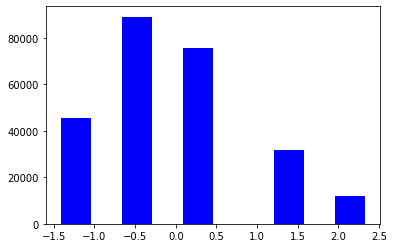

In [ ]:
var = 'GenHlth'

plt.hist(df[var], color='blue')
plt.show()


In [ ]:
corr = df.corr()
corr

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.120859,0.211040,0.212709,0.086096,0.221618,-0.098713,-0.127844
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.203754,0.240723,0.223618,0.052207,0.344452,-0.135597,-0.150415
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.135226,0.178818,0.144672,0.031205,0.272318,-0.069636,-0.077236
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,0.057440,0.054612,0.040585,-0.022115,0.090321,-0.000177,0.013363
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,-0.048295,0.109125,0.197078,0.042950,-0.036618,-0.096443,-0.091918
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.062879,0.133880,0.122463,0.093662,0.120641,-0.147176,-0.107153
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.053252,0.155843,0.176567,0.002978,0.126974,-0.075366,-0.121630
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.094919,0.206326,0.224239,0.031040,0.185026,-0.129537,-0.158099
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.030041,-0.209309,-0.253174,0.032482,-0.092511,0.191905,0.179864
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,0.061378,-0.022678,-0.048352,-0.091175,0.064547,0.102387,0.079013


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [ ]:
df.to_csv('heart_indicators_clean.csv', sep = ",", index = False)

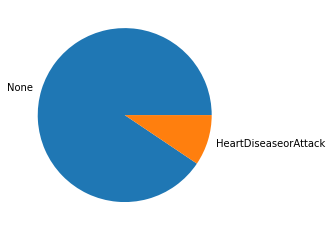

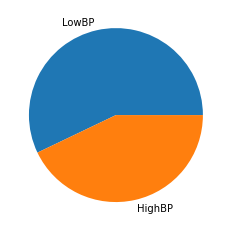

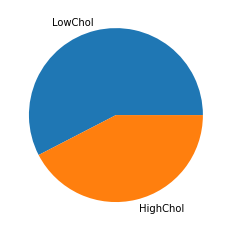

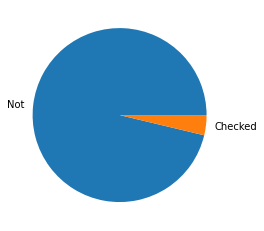

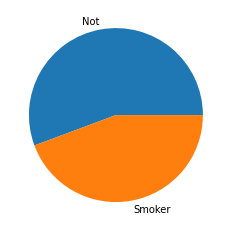

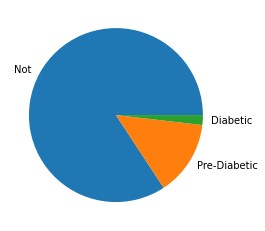

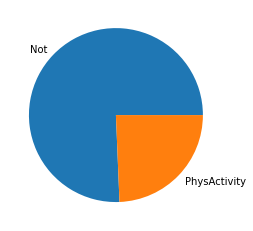

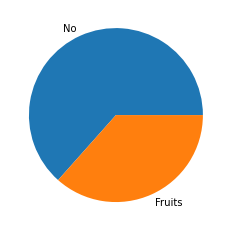

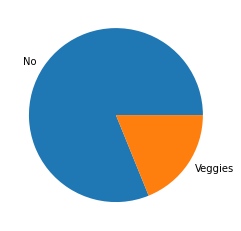

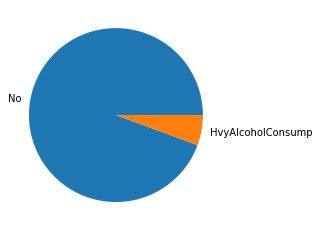

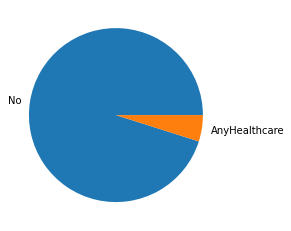

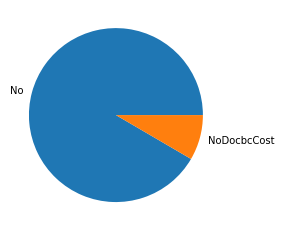

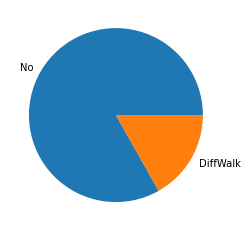

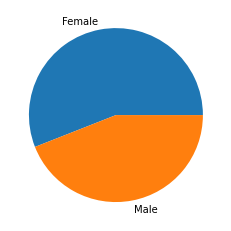

In [ ]:
def pie(labels, data):
  a = np.array(data.value_counts())
  plt.pie(a, labels=labels)
  plt.show()
  #axis.set_xlabel(label)

#fig, axes = plt.subplots(7,2, figsize=(15,50))


index = 0

binary = ["HeartDiseaseorAttack","HighBP","HighChol","CholCheck","Smoker","Diabetes","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","DiffWalk","Sex"]

pie(["None","HeartDiseaseorAttack"], df["HeartDiseaseorAttack"])
pie(["LowBP","HighBP"], df["HighBP"])
pie(["LowChol","HighChol"], df["HighChol"])
pie(["Not","Checked"], df["CholCheck"])
pie(["Not","Smoker"], df["Smoker"])
pie(["Not","Pre-Diabetic","Diabetic"], df["Diabetes"])
pie(["Not","PhysActivity"], df["PhysActivity"])
pie(["No","Fruits"], df["Fruits"])
pie(["No","Veggies"], df["Veggies"])
pie(["No","HvyAlcoholConsump"], df["HvyAlcoholConsump"])
pie(["No","AnyHealthcare"], df["AnyHealthcare"])
pie(["No","NoDocbcCost"], df["NoDocbcCost"])
pie(["No","DiffWalk"], df["DiffWalk"])
pie(["Female","Male"], df["Sex"])

#fig.show()

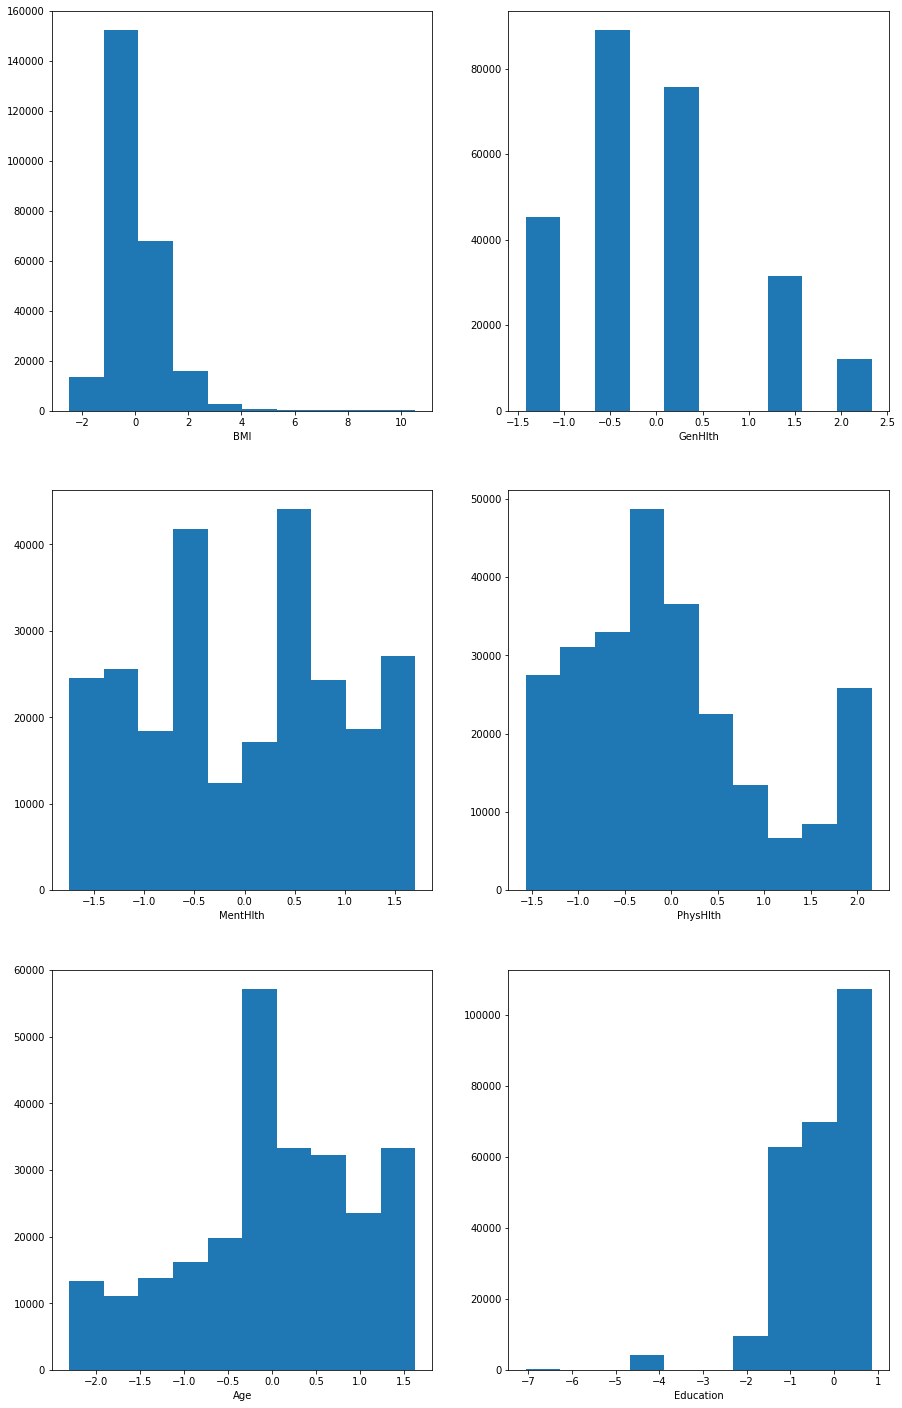

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,25))

index = 0

binary = ["BMI","GenHlth","MentHlth","PhysHlth","Age","Education","Income"]

for row in axes:
  for col in row:
    col.hist(df[binary[index]])
    col.set_xlabel(binary[index])
    index += 1
fig.show()

# Random Forest Model & Feature Engineering

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

y = df['HeartDiseaseorAttack']  # Labels
X = df.drop(['HeartDiseaseorAttack'],axis=1)  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.329121,-0.372636,1.593455,1.0,0.0,0.316900,-0.930067,-1.206773
1,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.457294,-1.634813,-1.530440,0.0,0.0,-0.337933,0.863221,-3.390563
2,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,2.329121,-0.079196,2.157161,1.0,0.0,0.316900,-0.930067,0.742891
3,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,-0.478619,0.356050,-0.408177,0.0,0.0,0.971733,-2.202426,0.171045
4,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,-0.478619,-1.401897,-1.399143,0.0,0.0,0.971733,0.056851,-0.634927


In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)
resampled_ds = tf.data.Dataset.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

NameError: ignored

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9027252181225691


In [ ]:
clf_2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

clf_2.fit(X_train, y_train)

y_pred2 = clf_2.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9023967202775149


In [ ]:
clf_3 = RandomForestClassifier(
                          n_estimators = 100,
                          criterion = 'gini',
                          max_depth = 100
                          )

clf_3.fit(X_train, y_train)

y_pred3 = clf_3.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9017528645012088


In [ ]:
# Feature Names 
feature_names = list(X.columns)

In [ ]:
print(clf.feature_importances_)

[0.027385   0.02443881 0.00367672 0.19016759 0.02336907 0.02918686
 0.02928029 0.02984844 0.02288832 0.0268437  0.00916977 0.00778044
 0.01487981 0.06842954 0.05963682 0.09827792 0.02599448 0.02341537
 0.11198308 0.07068345 0.10266452]


In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index = feature_names).sort_values(ascending=False)
feature_imp

BMI                  0.190168
Age                  0.111983
Income               0.102665
PhysHlth             0.098278
Education            0.070683
GenHlth              0.068430
MentHlth             0.059637
PhysActivity         0.029848
Diabetes             0.029280
Stroke               0.029187
HighBP               0.027385
Veggies              0.026844
DiffWalk             0.025994
HighChol             0.024439
Sex                  0.023415
Smoker               0.023369
Fruits               0.022888
NoDocbcCost          0.014880
HvyAlcoholConsump    0.009170
AnyHealthcare        0.007780
CholCheck            0.003677
dtype: float64

No handles with labels found to put in legend.


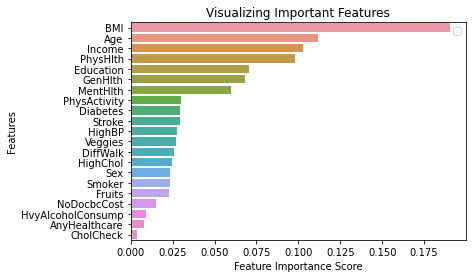

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
mdf_imp = df[['HeartDiseaseorAttack','BMI','PhysHlth','Age','MentHlth','Education','GenHlth','Income']]

In [ ]:
print(df_imp.head())

   HeartDiseaseorAttack       BMI  PhysHlth       Age  MentHlth  Education  \
0                   0.0  1.757936  1.663835  0.316900  2.226417  -0.930067   
1                   0.0 -0.511806 -0.987206 -0.337933 -0.944663   0.863221   
2                   0.0 -0.057858  2.210267  0.316900  2.786853  -0.930067   
3                   0.0 -0.209174 -0.571664  0.971733 -0.184198  -2.202426   
4                   0.0 -0.663122 -0.328588  0.971733  0.260645   0.056851   

    GenHlth    Income  
0  2.329121 -1.206773  
1  0.457294 -3.390563  
2  2.329121  0.742891  
3 -0.478619  0.171045  
4 -0.478619 -0.634927  


In [ ]:
y2 = df_imp['HeartDiseaseorAttack']  # Labels
X2 = df_imp.drop(['HeartDiseaseorAttack'],axis=1)  # Features

# Split dataset into training set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3) # 70% training and 30% test

In [ ]:
#Create a Gaussian Classifier
clf_4 = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_4.fit(X_train2,y_train2)

y_pred4 = clf_4.predict(X_test2)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred4))

Accuracy: 0.8916482707873437
